## Import the dependencies

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

## Data Collection and Analysis

In [3]:
# loading the diabetes dataset
diabetes_dataset = pd.read_csv('diabetes.csv')

In [6]:
diabetes_dataset.head() #Dataset includes data for all the females only.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes_dataset.shape

(768, 9)

In [8]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
diabetes_dataset["Outcome"].value_counts()
# 500 none diabetic cases
# 268 diabetic cases

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


<Axes: >

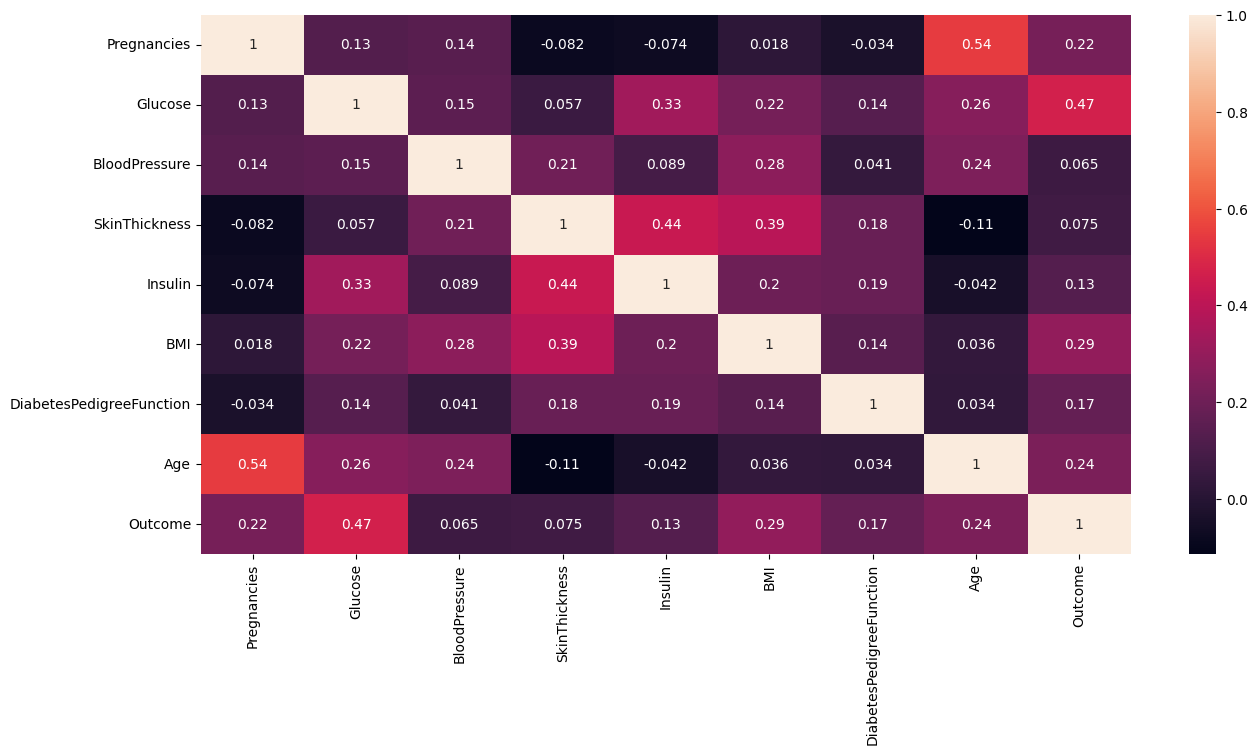

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(diabetes_dataset.corr(),annot=True)

In [16]:
X = diabetes_dataset.drop("Outcome",axis=1)
Y = diabetes_dataset["Outcome"]

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(X)

StandardScaler()

In [19]:
standardized_data = scaler.transform(X)

In [21]:
X = standardized_data
y = diabetes_dataset["Outcome"]

## Train Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=Y,random_state=42)
#Stratify - So that equal amounts of datas from the otput column goes to the train and test no bhedd bhaav

### Training The Model

In [24]:
classifier = svm.SVC(kernel='linear')

In [25]:
# Training the support vector machine classifier
classifier.fit(X_train, y_train)

SVC(kernel='linear')

## Evaluating our Model

In [28]:
predictions = classifier.predict(X_test)
print(accuracy_score(y_test,predictions))

0.7402597402597403


In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

[[81 19]
 [21 33]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       100
           1       0.63      0.61      0.62        54

    accuracy                           0.74       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



## Grid Search

In [32]:
from sklearn.model_selection import GridSearchCV


In [33]:
param_grid = {"C":[0.1,1,10,100],
             'gamma':[1,0.1,0.01,0.001]}

In [35]:
grid = GridSearchCV(svm.SVC(),param_grid,verbose=2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [36]:
grid_preds = grid.predict(X_test)

In [37]:
print(confusion_matrix(y_test, grid_preds))

[[83 17]
 [27 27]]


In [38]:
print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       100
           1       0.61      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



## Making a predictive System

In [40]:
input_data = (1,103,30,38,83,43.3,0.183,33)

# Turning input data into numpy array as it is easier
input_data_as_numpy_array = np.asarray(input_data)

#Reshape the data
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#Also we will have to standardize the data as our training data is standardized
std_data = scaler.transform(input_data_reshaped)
print(std_data)

[[-0.84488505 -0.56004775 -2.02166474  1.09545411  0.02778979  1.43512945
  -0.87244072 -0.0204964 ]]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [41]:
prediction = classifier.predict(std_data)
print(prediction) #It is correct

[0]


In [42]:
if prediction[0] == 0:
  print("The person is not diabetic")
else:
  print("The person is diabetic")

The person is not diabetic
